In [202]:
import numpy as np
import miniball
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

from ML2_lib import loss
from ML2_lib import noise
from ML2_lib import algo_sgd
from  ML2_lib import merge

In [203]:
# データ生成デモ Gauss
X_mean = 5
X_var = 2
w_star = np.array([1])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 1000
rng = np.random.default_rng()
X = rng.normal(loc=X_mean,size=(n,d),scale=X_var)
E = rng.normal(loc=0,scale=1,size=(1,n))
Y = np.dot(w_star,X.T) + E



In [204]:

a = loss.LinearQuadraticLoss()
w_init = np.zeros(d)
data = [X,Y.T]
lr = 0.01
core = algo_sgd.SGD(w_init=w_init,a=lr,t_max=n-1,data=data)
for _ in core:
    core.update(a)


In [205]:

core.w


array([1.10019991])

In [206]:

trial_num = 10 #試行回数
result_gauss = [] #パラメータの最終結果　トライアル数*分割数k*特徴量次元
result_loss_gauss = [] # 過剰期待損失の最終結果　トライアル数*分割数k
valid_k = 100 # 分割数　1 ~ valid_k

X_mean = 5
X_var = 2
a = 0.01 # 学習率
c = 5 # wの初期値がとりうる範囲
n = 250 # データセットのサンプル数
b = 2.2 # ノイズの分散
w_star = np.array([1])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]

for _ in tqdm(range(trial_num)):
    w_init = w_star + rng.uniform(-c,c,size=d)

    w_trial = [] # モデルを貯めていく、必要かどうか
    loss_store = [] # 過剰期待損失を貯めていく
    for k in range(1,valid_k+1):
        core_store = []
        model_store = []
        son = loss.LinearQuadraticLoss()
        for i in range(k):
            core_num = n // k
            rng = np.random.default_rng()
            X = rng.normal(loc=X_mean,size=(n,d),scale=X_var)
            E = rng.normal(loc=0,scale=b,size=(1,n))
            Y = np.dot(w_star,X.T) + E
            data = [X,Y.T]

            core = algo_sgd.SGD(w_init=w_init,a=a,t_max=core_num-1,data=data)
            for _ in core:
                core.update(son)
            core_store.append(core)
            model_store.append(core.w)


        w_dc,_ = miniball.get_bounding_ball(np.array(model_store).reshape((-1,d)), epsilon=1e-7)
        w_dc = w_dc.reshape(1,-1)
        w_trial.append(w_dc)
        # 過剰期待損失　E[(<(w-w^*),X>)^2]　Xが正規分布の場合　E[X^2] = X_mean^2 + X_var^2 * 単位行列
        E_X = np.diag(np.ones(w_dc.shape[0])* (X_var**2)  + (X_mean**2))
        excess_risk = np.dot(np.dot(E_X,w_dc),w_dc.T) + np.dot(np.dot(E_X,w_star),w_star.T) - 2 * np.dot(np.dot(E_X,w_star),w_dc.T)
        loss_store.append(excess_risk[0][0])
    result_gauss.append(np.array(w_trial))
    result_loss_gauss.append(np.array(loss_store))

result_gauss = np.array(result_gauss)
result_loss_gauss = np.array(result_loss_gauss)


  0%|          | 0/10 [00:00<?, ?it/s]

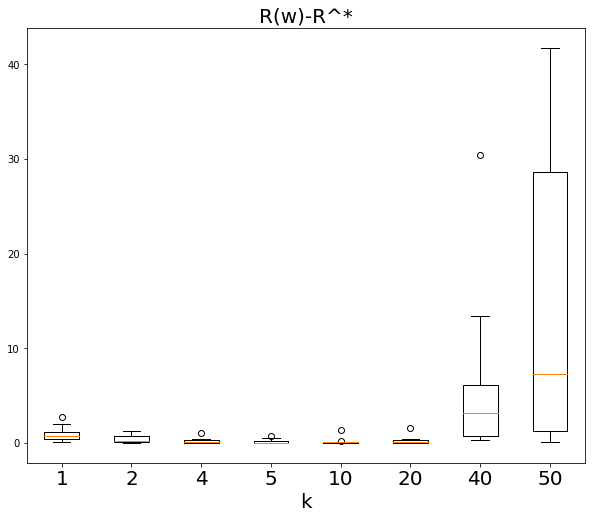

In [207]:
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20','40','50']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_gauss[:,[0,1,3,4,9,19,39,49]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()

In [208]:
df = pd.DataFrame(result_loss_gauss[:,[0,1,3,4,9,19,39,49]],columns=columns)
df.describe()

,1,2,4,5,10,20,40,50
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.980808,0.399779,0.233970,0.184734,0.201215,0.278524,6.449897,14.792473
std,0.838382,0.470361,0.316174,0.264234,0.416048,0.485992,9.311649,15.756557
min,0.102616,0.005680,0.000312,0.016656,0.000134,0.000319,0.271993,0.119051
25%,0.428904,0.069399,0.016694,0.022204,0.018884,0.008392,0.730959,1.278607
50%,0.778880,0.175669,0.101058,0.035491,0.061966,0.064715,3.204315,7.300339
75%,1.205483,0.766096,0.336140,0.265738,0.109160,0.331766,6.124508,28.606902
max,2.724626,1.292174,1.011539,0.764440,1.365120,1.581153,30.370434,41.746793


In [209]:
model_store

[array([[3.15615868]]),
 array([[2.90999181]]),
 array([[3.59076699]]),
 array([[3.36269882]]),
 array([[3.13901006]]),
 array([[2.92166053]]),
 array([[2.20920428]]),
 array([[3.1613691]]),
 array([[3.44696763]]),
 array([[2.80666532]]),
 array([[3.64714495]]),
 array([[3.76885605]]),
 array([[2.85890122]]),
 array([[3.37025723]]),
 array([[3.5331917]]),
 array([[3.75511856]]),
 array([[1.73403193]]),
 array([[3.69023825]]),
 array([[3.47655155]]),
 array([[2.57533452]]),
 array([[3.288958]]),
 array([[2.32726723]]),
 array([[2.75766982]]),
 array([[2.62217616]]),
 array([[2.71313781]]),
 array([[3.47495316]]),
 array([[3.0278037]]),
 array([[3.51723471]]),
 array([[2.92705272]]),
 array([[2.87272563]]),
 array([[3.06987718]]),
 array([[3.36362162]]),
 array([[2.55231683]]),
 array([[3.4662451]]),
 array([[2.50390345]]),
 array([[1.77925475]]),
 array([[3.04541246]]),
 array([[2.99010164]]),
 array([[2.92273486]]),
 array([[3.24694701]]),
 array([[3.36533247]]),
 array([[2.73014563]])